In [9]:
from pathlib import Path
import numpy as np
from PIL import Image
import glob
from facenet_models import FacenetModel
from vision_profile import FaceDatabase
from camera import take_picture
from estimation import plot_histograms, is_true_positive
from cosdistance import cosine_distance
from descriptor import descriptorMatch, displayFinalPicture


%matplotlib inline


model = FacenetModel()

In [10]:
labels = []

db = FaceDatabase(file_path="database.pkl")
count = 0
for filename in glob.glob(r'.\pics\train\*.jpg'):
    if count == 3:
        break
    pic = Image.open(filename)
    pic_arr = np.array(pic)
    boxes, probabilities, landmarks = model.detect(pic_arr)
    name = filename[13:-6]
    print(name)
    labels.append(name)
    descriptors = model.compute_descriptors(pic_arr, boxes) #gets descriptor for every file
    db.add_image(name, descriptors)
    print('added')
    count += 1
    
db.save()
print('saved')

Angelina_Jolie
added
Angelina_Jolie
added
Angelina_Jolie
added
saved


In [11]:
db.load('database.pkl')
print(db.data.keys())
print(list(db.data.values())[0].descriptors)

dict_keys(['Angelina_Jolie'])
[array([[ 2.53094709e-03, -3.71902660e-02, -5.77739738e-02,
        -5.72847128e-02,  1.15000673e-01,  2.31448561e-03,
         9.68842730e-02,  4.83588595e-03, -2.85893809e-02,
        -2.12112106e-02,  1.91344600e-02,  3.69862579e-02,
        -2.27456391e-02, -9.99435633e-02,  7.15300720e-03,
         4.96518565e-03, -1.53757883e-02, -1.55381057e-02,
        -3.61230634e-02,  1.66289583e-02,  6.45907270e-03,
         1.23631628e-02, -4.45691906e-02, -6.02729246e-03,
        -2.56528128e-02,  4.67029363e-02,  4.33788262e-02,
        -8.11299384e-02, -1.17641399e-02, -5.82625978e-02,
         1.76234338e-02, -5.78814968e-02, -8.15117825e-03,
         1.26365768e-02, -2.64637116e-02,  3.72733399e-02,
         6.33092374e-02, -3.93714570e-02,  3.96384038e-02,
         4.78462409e-03,  5.87017573e-02, -9.00705457e-02,
        -1.46719227e-02, -4.22995500e-02, -1.89807974e-02,
         2.22622547e-02, -1.23808738e-02,  3.28752585e-02,
         2.09745448e-02, 

In [13]:
pic = Image.open(r'.\pics\test\Will_Smith_test.jpg')  
pic_arr = np.array(pic)
boxes, probabilities, landmarks = model.detect(pic_arr)
descriptors = model.compute_descriptors(pic_arr, boxes)
#database = FaceDatabase()
db.load('database.pkl')
print(f"Number of faces detected: {len(boxes)}")
verdict = descriptorMatch(db, descriptors, threshold=0.5)
print(verdict)
displayFinalPicture(pic_arr, verdict)

Number of faces detected: 1


AxisError: axis 0 is out of bounds for array of dimension 0

Angelina_Jolie
Angelina_Jolie
Angelina_Jolie
Scarlett_Johansson
Scarlett_Johansson
Scarlett_Johansson
Tom_Cruise
Tom_Cruise
Tom_Cruise
Will_Smith
Will_Smith
Will_Smith


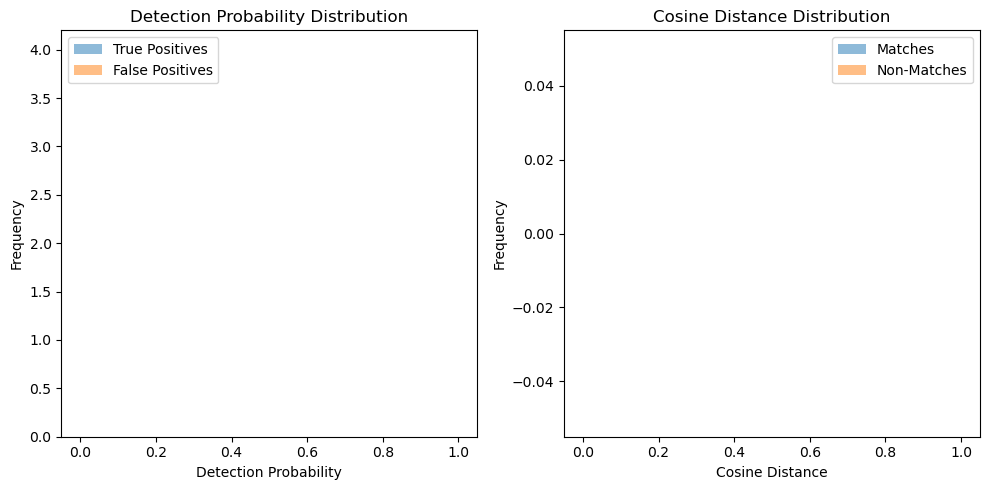

In [ ]:
%matplotlib inline
match_distances = []
non_match_distances = []
true_positives = []
false_positives = []


for filename in glob.glob(r'./pics/train/*.jpg'):

    pic = Image.open(filename)
    pic_arr = np.array(pic)
    boxes, probs, landmarks = model.detect(pic_arr)
    descriptors = model.compute_descriptors(pic_arr, boxes)
    

    for prob in probs:
        if is_true_positive(prob, threshold=0.5): # 0.5 is placeholder [0,1]
            true_positives.append(prob)
        else:
            false_positives.append(prob)

    # for i, descriptor1 in enumerate(descriptors):
    #     for j, descriptor2 in enumerate(descriptors):
    #         if i < j:
    #             distance = cosine_distance(descriptor1, descriptor2, labels)[0][0]
    #             if labels[i] == labels[j]:
    #                 match_distances.append(distance)
    #             else:
    #                 non_match_distances.append(distance)
    matches, non_matches = cosine_distance(descriptor1, descriptor2, labels)


plot_histograms(true_positives, false_positives, match_distances, non_match_distances)

    # print(descriptors)

    # detections = [detect_face_prob(img, model) for img in pic_arr]
    # descriptors = [extract_descriptors(img, boxes, model) for img, (boxes, _, _) in zip(pic_arr, detections)]
    # descriptors = np.concatenate(descriptors, axis=0)
    # labels = np.concatenate([[label] * len(boxes) for label, (boxes, _, _) in zip(pic_arr, detections)], axis=0)

    # match_distances, non_match_distances = cosine_distance(descriptors, labels, model)
    # true_positives = [prob for _, probs in detections for prob in probs if is_true_positive(prob, labels)]
    # false_negatives = [prob for _, probs in detections for prob in probs if not is_true_positive(prob, labels)]